In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import Fish_data

In [77]:
f = Fish_data.Fish()
fish_data = f.get_fish_data()

In [32]:
len(fish_data.index)

101114

In [78]:
weight = df[['Relative weight']]
weight = weight.fillna(0)
df['new_weight'] = weight


# species without weights

In [71]:
#SPECIES WITHOUT weights
specieswoweights = df.loc[df['new_weight']==0]
specieswoweights['Species'].unique()

array(['LMB', 'WAE', 'BLC', 'RBT', 'CRP', 'CCF', 'FMS', 'BGL', 'GSF',
       'BNT', 'YBH', 'BTC', 'BBH', 'WHS', 'CPM', 'CTT', 'RZB', 'CCT',
       'STB', 'BFL', 'RSH', 'blc', 'BM,', 'OTH', 'RLC', 'NPK', 'SMB',
       'FLM', 'BRT', 'BCL', 'BTR', 'BG', 'SFH', 'KOK', 'TFS', 'RDS',
       'ccf', 'BLG', 'lmb', 'CC', 'BC', 'YGH', 'WTC', 'WHC', 'GZD', 'WCP',
       'stb', 'tfs', 'gsf', 'smb', 'bgl', 'rsh', '70', 'gzd', 'cct',
       'tfs`', 'snb', 'blg', 'sj', 'sgf', 'gh', 'ybh', 'crp', 'wae', 'u',
       'gssf', ' bgl', 'bcl', 'cat', 'dtb', 'awe', 'el', 'gdf', ' gsf',
       'amb', 'gnf', 'bbh', 'wal', 'gsh', 'we', 'fms', 'rzb', 'was',
       'wea', 'gbl', 'cpm', 'gaf', 'gaz', 'carp', 'GLB', 'GZDL', 'GAF',
       'GSDF', 'SNB', 'CARP', 'GBL', 'GZC', 'HBC', 'RBS'], dtype=object)

In [52]:
STBspecieswo = specieswoweights.loc[specieswoweights['Species'] == "STB"]
STBspecieswo['Species'].count()

1166

In [53]:
SMBspecieswo = specieswoweights.loc[specieswoweights['Species'] == "SMB"]
SMBspecieswo['Species'].count()

7114

In [54]:
stbspecieswo = specieswoweights.loc[specieswoweights['Species'] == "stb"]
stbspecieswo['Species'].count()

732

In [55]:
smbspecieswo = specieswoweights.loc[specieswoweights['Species'] == "smb"]
smbspecieswo['Species'].count()

1639

In [56]:
lmbspecieswo = specieswoweights.loc[specieswoweights['Species'] == "lmb"]
lmbspecieswo['Species'].count()

1098

In [57]:
#This is how many samples we could impute weight for
1166+7114+732+1639+1098

11749

In [59]:
#This is how many samples we'll have left with no weights
81873-11749

70124

# species with weights

In [80]:
#species with weights
specieswithweights = df.loc[df['new_weight']!=0]
specieswithweights['Species'].unique()

array(['STB', 'SMB', 'stb', 'smb', 'lmb'], dtype=object)

In [ ]:
specieswithweights.head()

In [90]:
#How many fish are in each species with weights?
STBspecies = specieswithweights.loc[specieswithweights['Species'] == "STB"]
STBspecies['Species'].count()

12384

In [47]:
SMBspecies = specieswithweights.loc[specieswithweights['Species'] == "SMB"]
SMBspecies['Species'].count()

3109

In [41]:
stbspecies = specieswithweights.loc[specieswithweights['Species'] == "stb"]
stbspecies['Species'].count()

2172

In [42]:
smbspecies = specieswithweights.loc[specieswithweights['Species'] == "smb"]
smbspecies['Species'].count()

1571

In [43]:
lmbspecies = specieswithweights.loc[specieswithweights['Species'] == "lmb"]
lmbspecies['Species'].count()

5

In [48]:
12384+2172+1571+5+3109

19241

# Lets look at the differnces in weight between the STB and the SMB

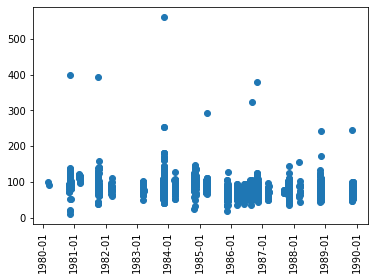

In [62]:
get_time(STBspecies, '1980-01-01', '1990-01-01')

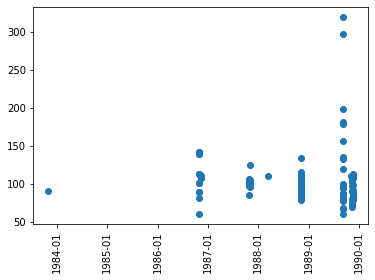

In [63]:
get_time(SMBspecies, '1980-01-01', '1990-01-01')

# We need to write a linear regression function.

In [ ]:
import statsmodels.api as sm

In [93]:
# define the data/predictors as the pre-set feature names  
# df = fish_data
# weight = df[['Relative weight']]
# weight = weight.fillna(0)
# df['new_weight'] = weight
# # Put the target (housing value -- MEDV) in another DataFrame
# target = df[["new_weight"]]
# target

# define the data/predictors as the pre-set feature names  
specieswithweights = df.loc[df['new_weight']!=0]
STBspecies = specieswithweights.loc[(specieswithweights['Species'] == "STB") | (specieswithweights['Species'] == "stb")]
# SMBspecies = specieswithweights.loc[(specieswithweights['Species'] == "SMB") | (specieswithweights['Species'] == "smb")]


# Put the target (housing value -- MEDV) in another DataFrame


# import statsmodels.api as sm

# X = df["new_weight"]
# y = target["new_weight"]

# # Note the difference in argument order
# model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
# model.summary()

In [3]:
import datetime
from datetime import timedelta
from datetime import date
df = fish_data
mydate = df[["Date"]]
weight = df[['Relative weight']]
weight = weight.fillna(0)
newdf = pd.DataFrame(weight, mydate)

new = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M', errors='coerce')

#drop the two date that claim to be from the 1600s
type(new)

lastdate = new[new.between('1980-01-01', '2020-01-01')]
lastw = weight[new.between('1980-01-01', '2020-01-01')]

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


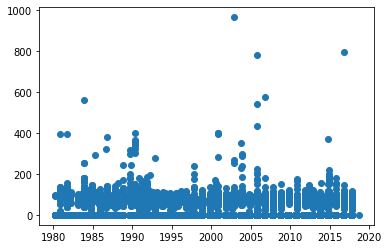

In [4]:
plt.plot_date(lastdate, lastw)

In [5]:
#time must be in the form year-month-day
import matplotlib.dates as mdates
def get_time(df, start_time, end_time):
    mydate = df[["Date"]]
    weight = df[['Relative weight']]
    weight = weight.fillna(0)
    newdf = pd.DataFrame(weight, mydate)

    new = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M', errors='coerce')

    #drop the two date that claim to be from the 1600s
    type(new)

    lastdate = new[new.between(start_time, end_time)]
    lastw = weight[new.between(start_time, end_time)]
    
    fig, ax = plt.subplots()
    ax.plot_date(lastdate, lastw)
    # ax.set_xticks(lastdate)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
    _=plt.xticks(rotation=90)  

In [6]:
df.head()

,FishID,Date,TREND,Gear,Species,Sex,Length,Mass,Ktl,Relative weight,...,parasite,misc 1 text,misc 2 num,misc 3 text,misc 4 num,Site,KFL,Day,Month,Year
0,19710001,1971-03-09 00:00:00,1,GN,LMB,NaN,263,250.0,1.37,0.0,...,NaN,NaN,NaN,NaN,NaN,RN,0.0,9.0,3.0,1971.0
1,19710002,1971-03-09 00:00:00,1,GN,LMB,NaN,348,700.0,1.66,0.0,...,NaN,NaN,NaN,NaN,NaN,RN,0.0,9.0,3.0,1971.0
2,19710003,1971-03-09 00:00:00,1,GN,LMB,NaN,332,555.0,1.51,0.0,...,NaN,NaN,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0
3,19710004,1971-03-09 00:00:00,1,GN,LMB,NaN,350,720.0,1.67,0.0,...,NaN,NaN,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0
4,19710005,1971-03-09 00:00:00,1,GN,LMB,NaN,300,455.0,1.68,0.0,...,NaN,NaN,NaN,NaN,NaN,RN,NaN,9.0,3.0,1971.0


array(['STB', 'SMB', 'stb', 'smb', 'lmb'], dtype=object)

In [20]:
#we need to separate out the species
import filter
df = fish_data
df.head()
species = df.loc[df['Species'] == "LMB"]
species['Relative weight'].unique()

array([ 0., nan])

In [24]:
fil = filter.Filter(df)
fil.givenSpecies(['CRP'])
fil.df["Relative weight"].unique()

array([ 0., nan])

In [17]:
#let's impute the weights for the LMB species


array([ 0., nan])

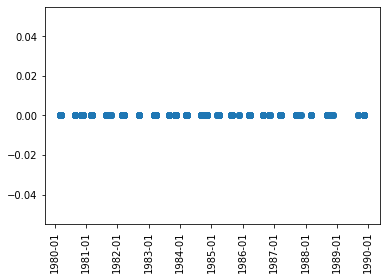

In [10]:
get_time(fil.df, '1980-01-01', '1990-01-01')

In [11]:
get_time('1980-01-01', '1981-01-01')


TypeError: get_time() missing 1 required positional argument: 'end_time'

In [ ]:
get_time('1981-01-01', '1982-01-01')

In [ ]:
get_time('1980-01-01', '1982-01-01')

In [ ]:
get_time('1982-01-01', '1983-01-01')

In [ ]:
import matplotlib.dates as mdates

df = fish_data
mydate = df[["Date"]]
weight = df[['Relative weight']]
weight = weight.fillna(0)
newdf = pd.DataFrame(weight, mydate)

new = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M', errors='coerce')

#drop the two date that claim to be from the 1600s
type(new)

lastdate = new[new.between('1980-01-01', '1981-01-01')]
lastw = weight[new.between('1980-01-01', '1981-01-01')]

fig, ax = plt.subplots()
ax.plot_date(lastdate, lastw)
# ax.set_xticks(lastdate)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m"))
_=plt.xticks(rotation=90)  